<a href="https://colab.research.google.com/github/SudarshanIngole/IABAC_Project/blob/main/IABAC_CDS_Project_Sudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Reading Excel file

In [2]:
data=pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')

# Basic Checks

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [7]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [8]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
list(data.select_dtypes(include='int64'))

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [10]:
num_data=data[['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']]

num_data.head(2)

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3


In [11]:
list(data.select_dtypes(include='object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

# Ordinal Features

In [12]:
ordinal_data = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
'EmpRelationshipSatisfaction','EmpWorkLifeBalance']]

ordinal_data

,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpRelationshipSatisfaction,EmpWorkLifeBalance
0,3,4,3,2,4,4,2
1,4,4,3,2,1,4,3
2,4,4,2,3,1,3,3
3,4,2,2,5,4,2,2
4,4,1,3,2,1,4,3
...,...,...,...,...,...,...,...
1195,1,4,4,2,4,2,3
1196,2,4,4,1,4,1,3
1197,1,4,4,1,3,3,3
1198,3,4,2,3,2,2,4


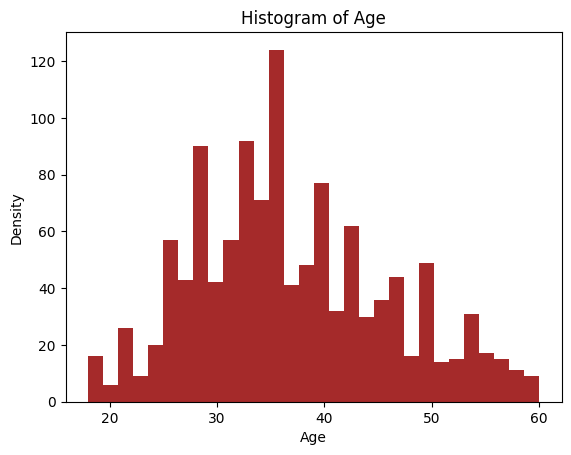

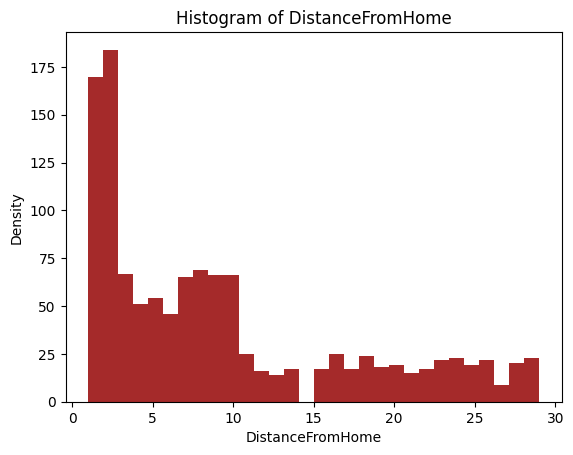

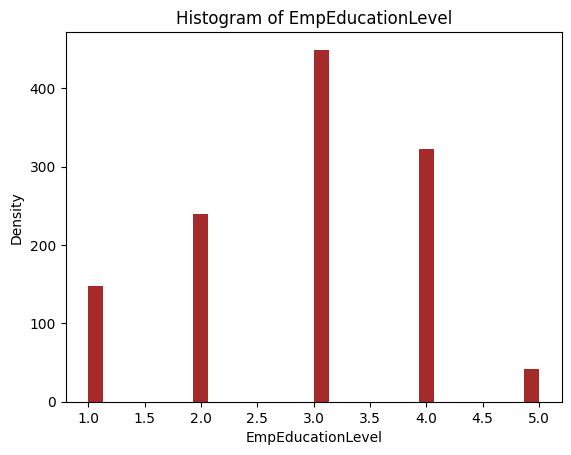

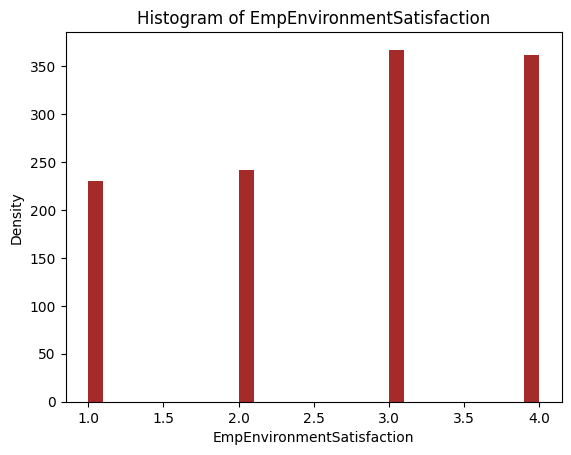

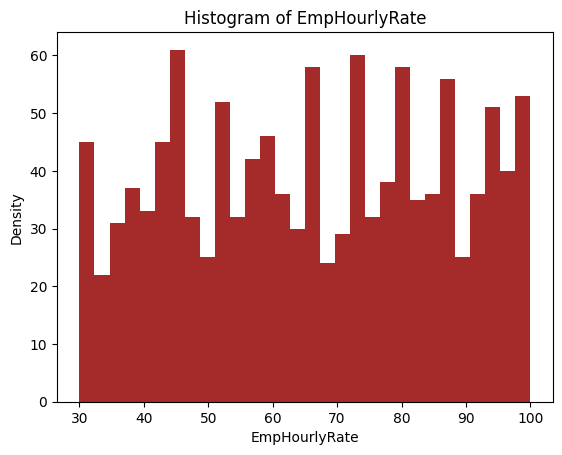

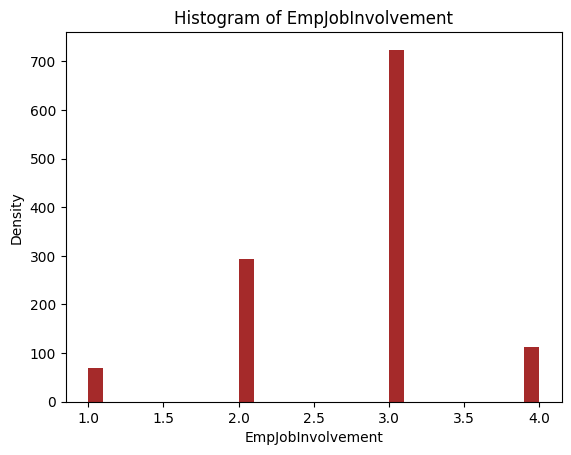

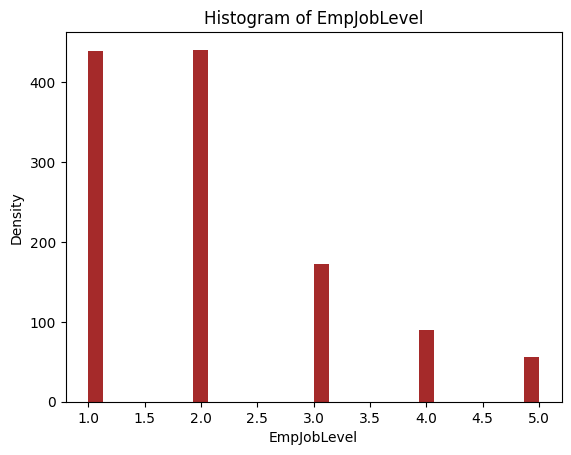

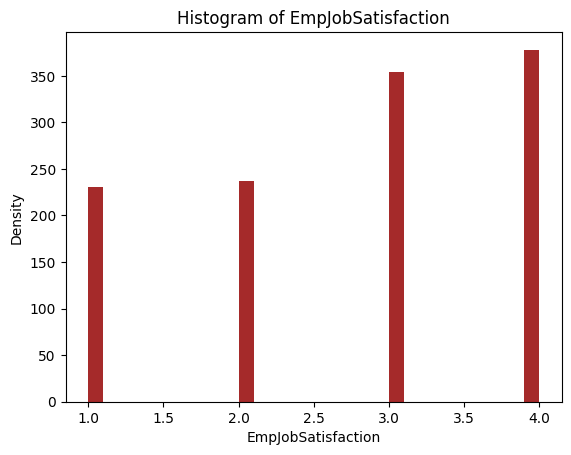

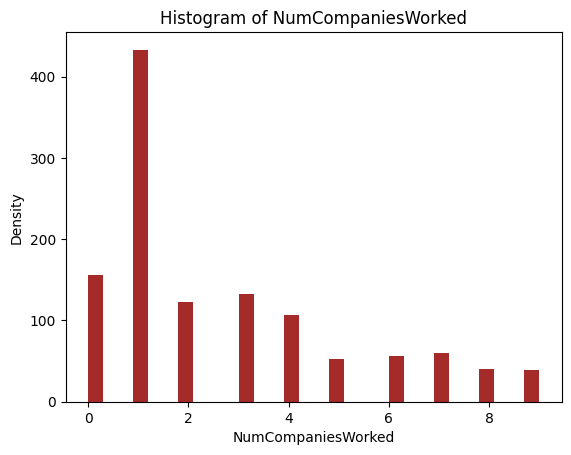

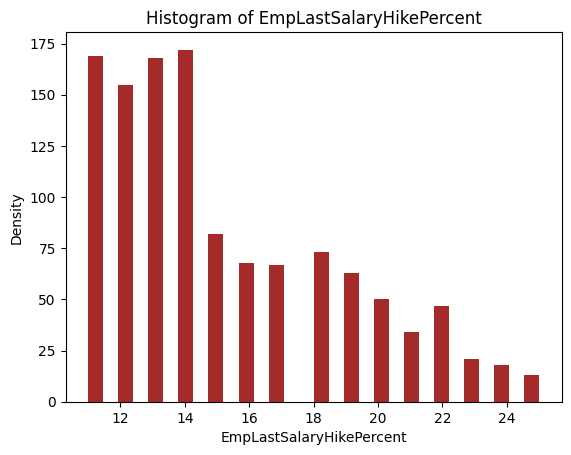

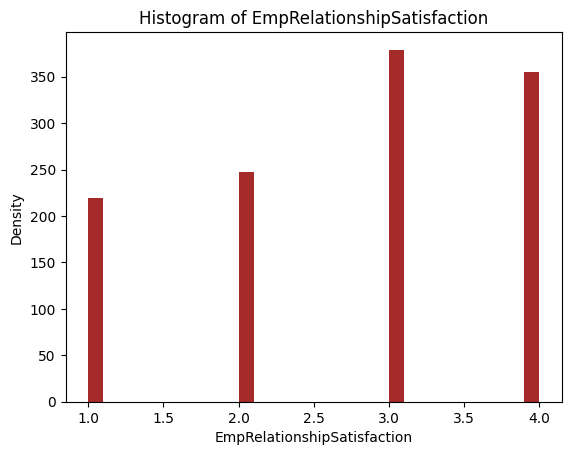

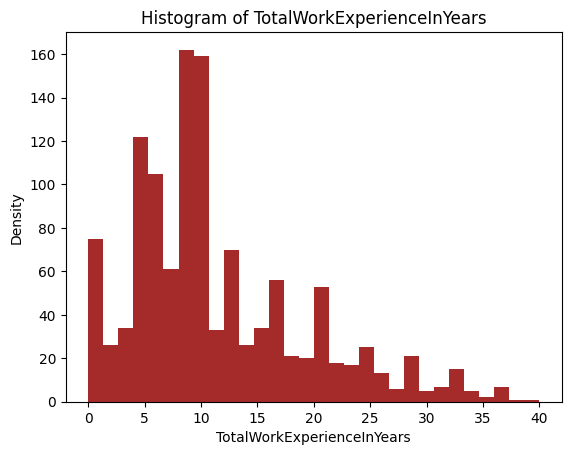

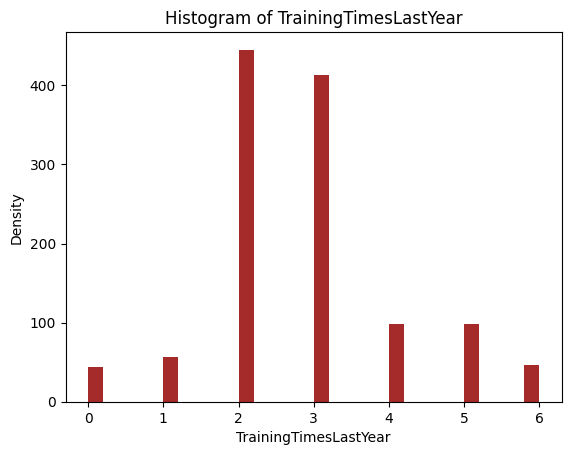

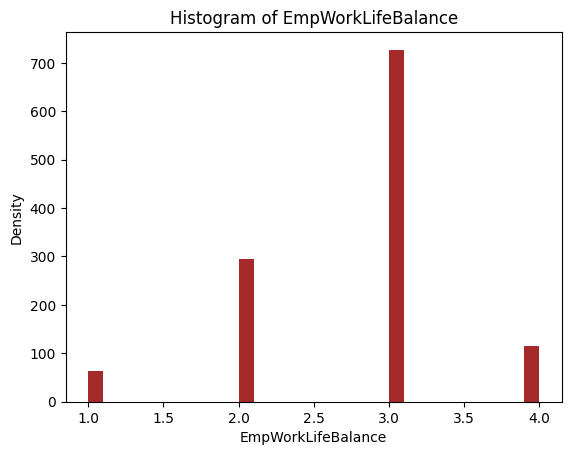

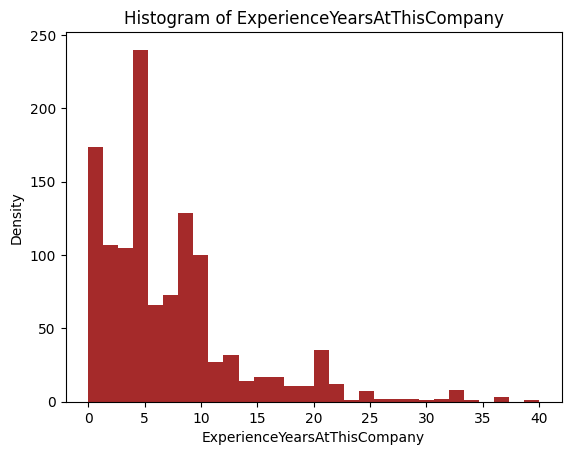

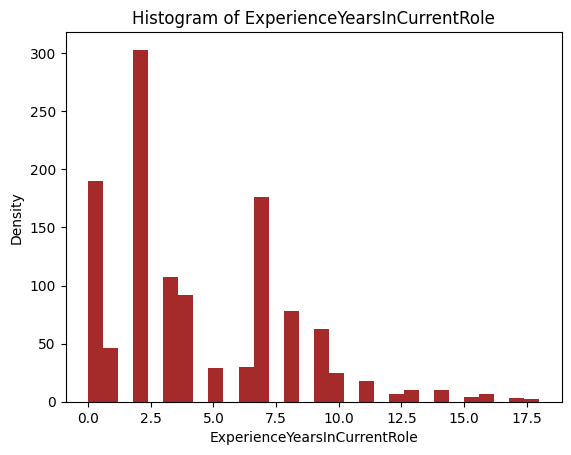

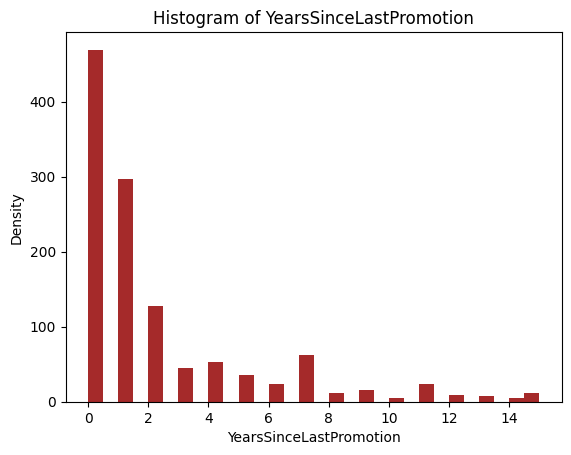

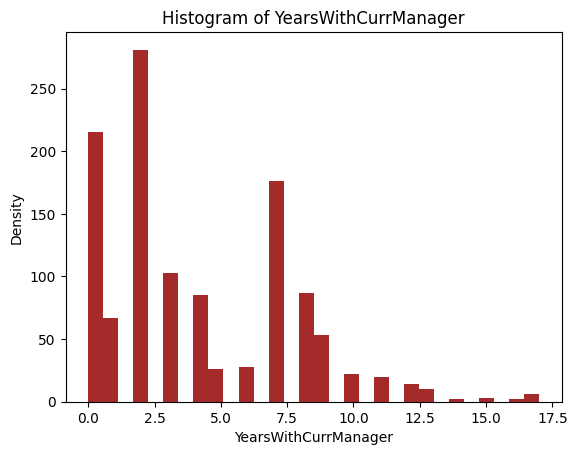

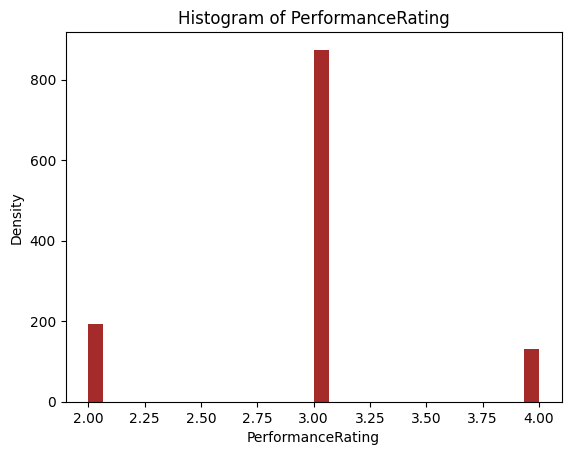

In [13]:
for column in num_data:
  #lt.subplot(len(num_data),2)
  plt.hist(data[column], bins=30, color='brown')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'Histogram of {column}')
  plt.show()

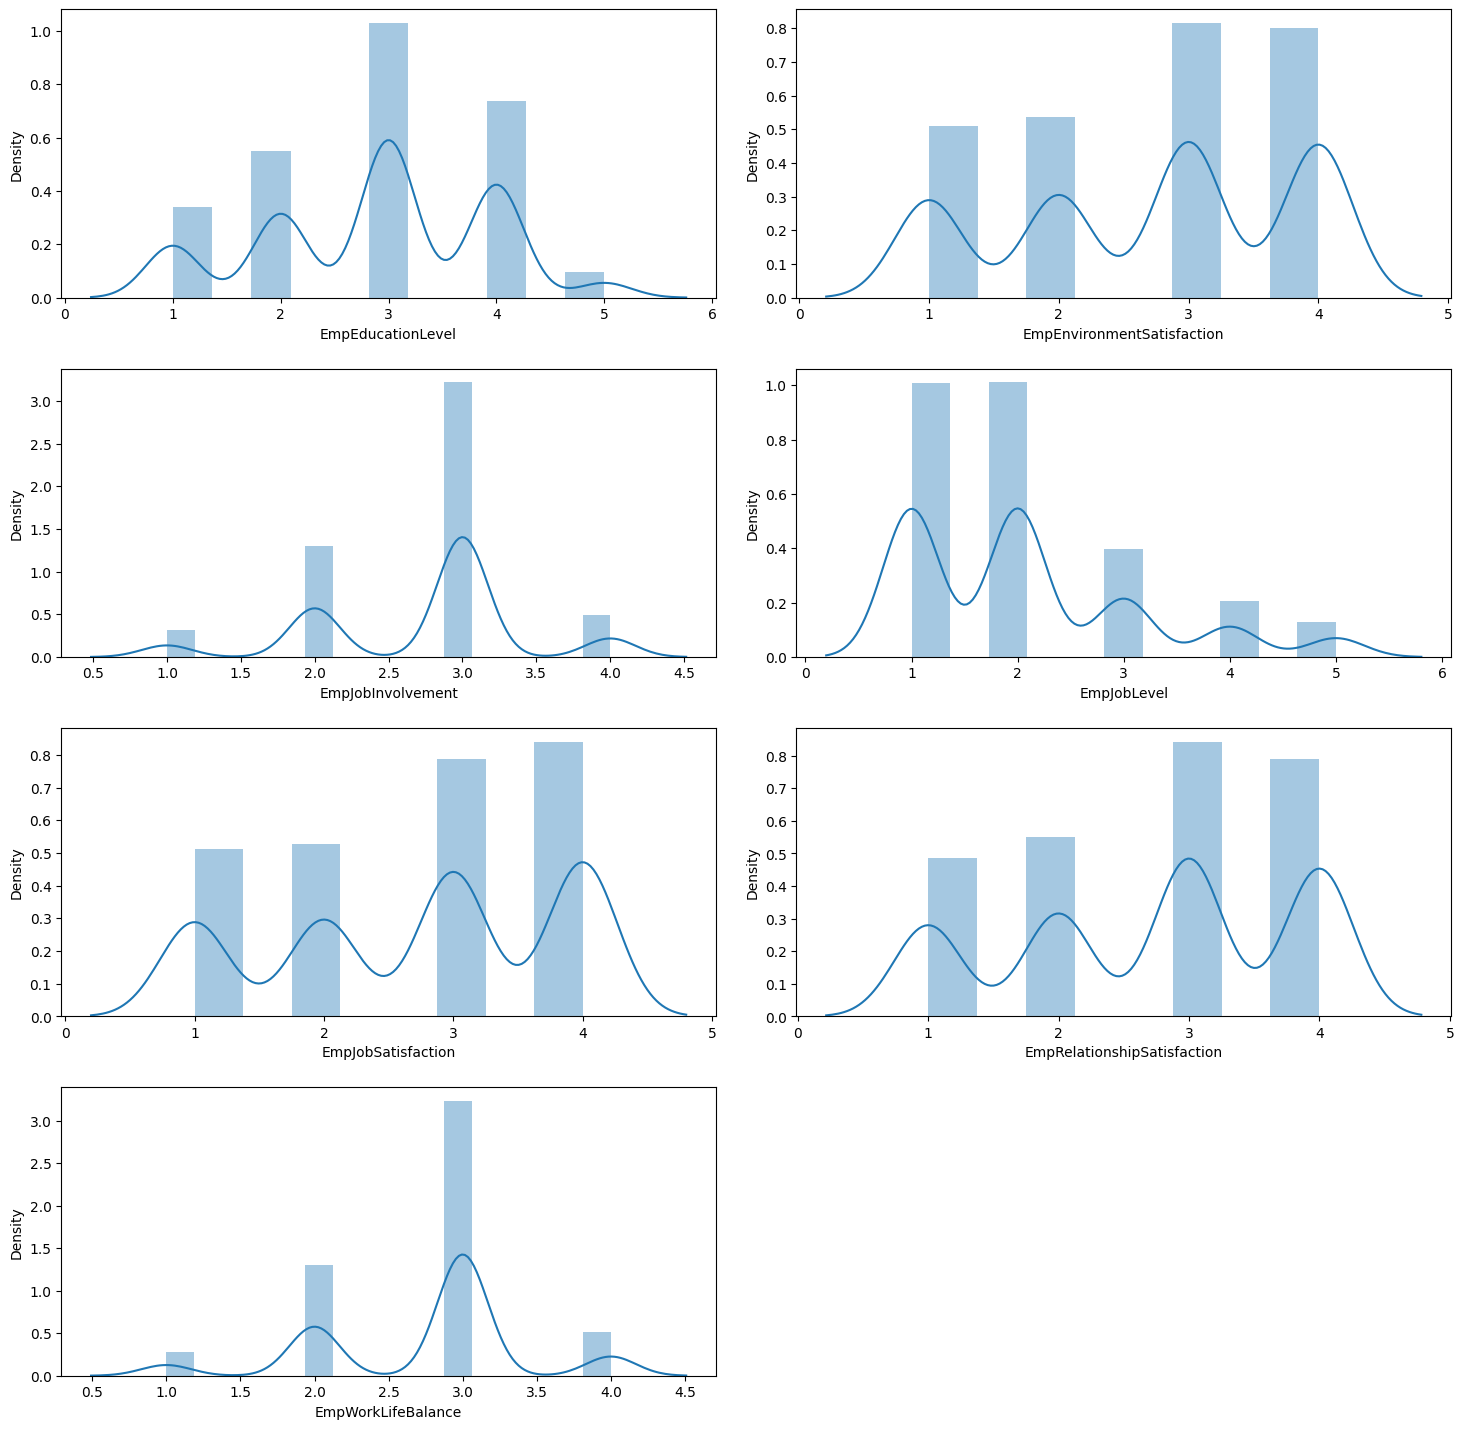

In [14]:
plt.figure(figsize=(15,25))

for index,cols in enumerate(ordinal_data):
    plt.subplot(7,2,index+1)
    sns.distplot(ordinal_data.loc[:,cols])
plt.tight_layout(pad=2)

# Categorical Feature

In [15]:
cat_data=data.select_dtypes(include='object')

In [16]:
cat_data

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...,...
1195,E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,E100995,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


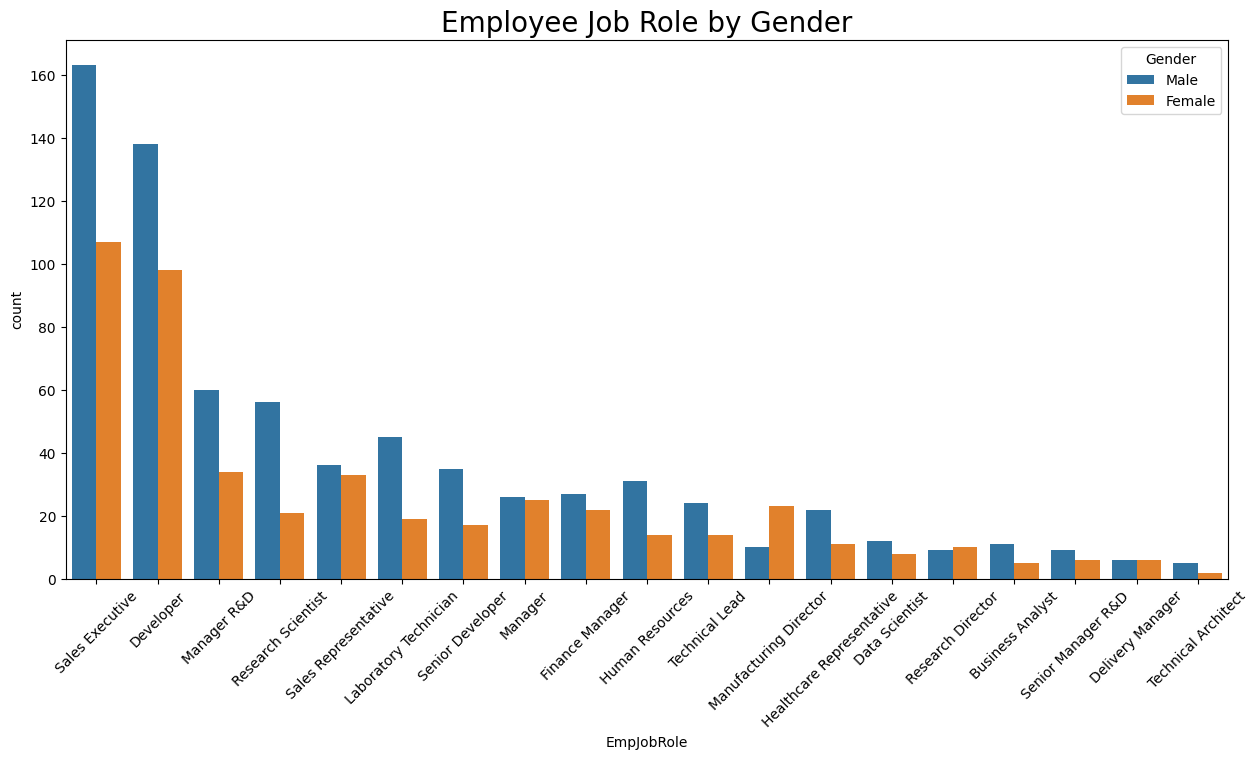

In [17]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.countplot(data=cat_data, x="EmpJobRole", hue="Gender", order=cat_data["EmpJobRole"].value_counts().index)
plt.title('Employee Job Role by Gender', fontsize=20)
plt.show()

<Axes: xlabel='EducationBackground', ylabel='count'>

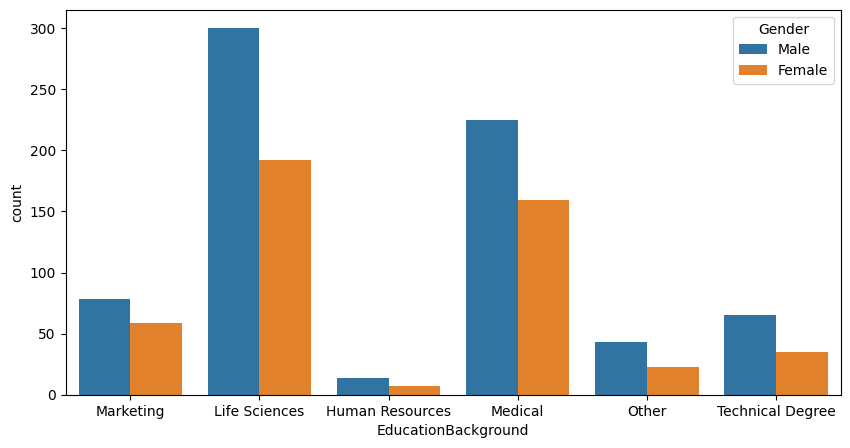

In [18]:
plt.figure(figsize=(10,5))

sns.countplot(data=cat_data, x='EducationBackground', hue='Gender')

# Check for Null Values

In [19]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* In this dataset there are no null values

# Checking the Outliers

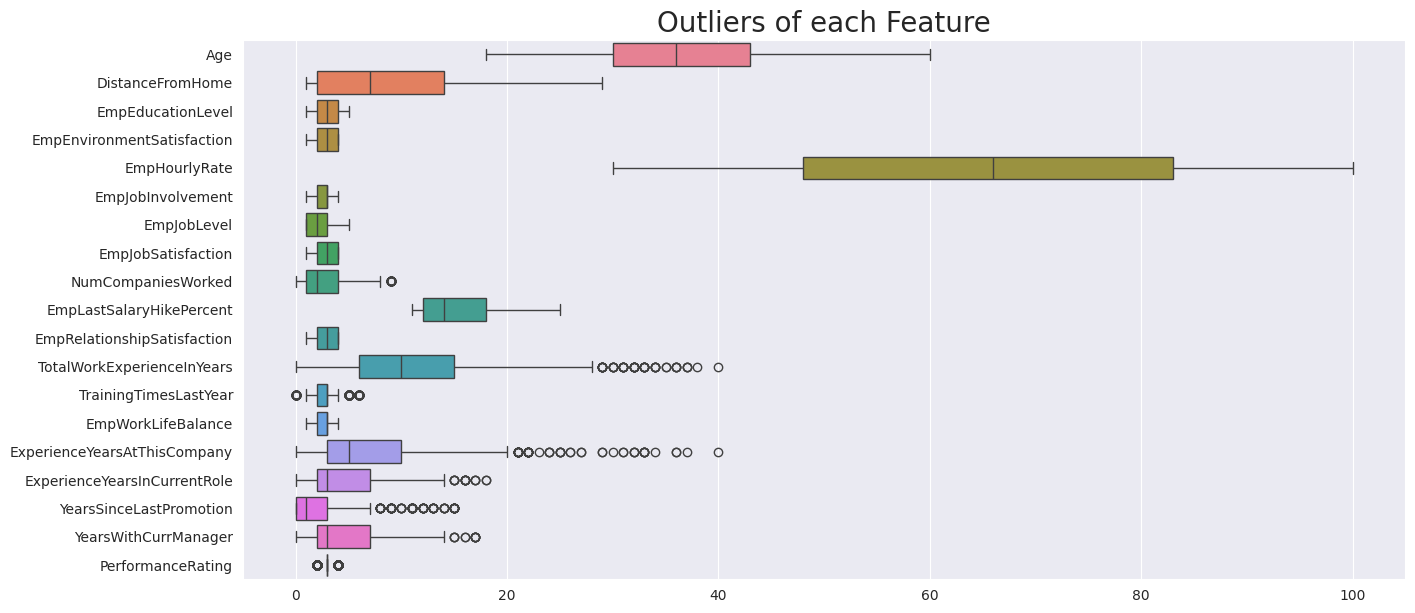

In [20]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
plt.title('Outliers of each Feature', fontsize=20)
sns.boxplot(data=data, orient='h')
plt.show()

# Boxplots for Numerical features

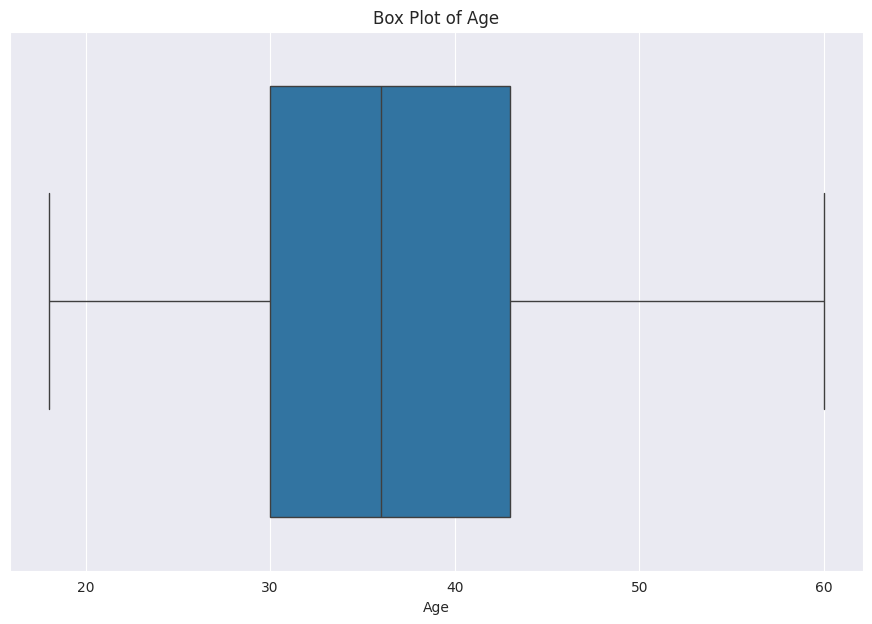

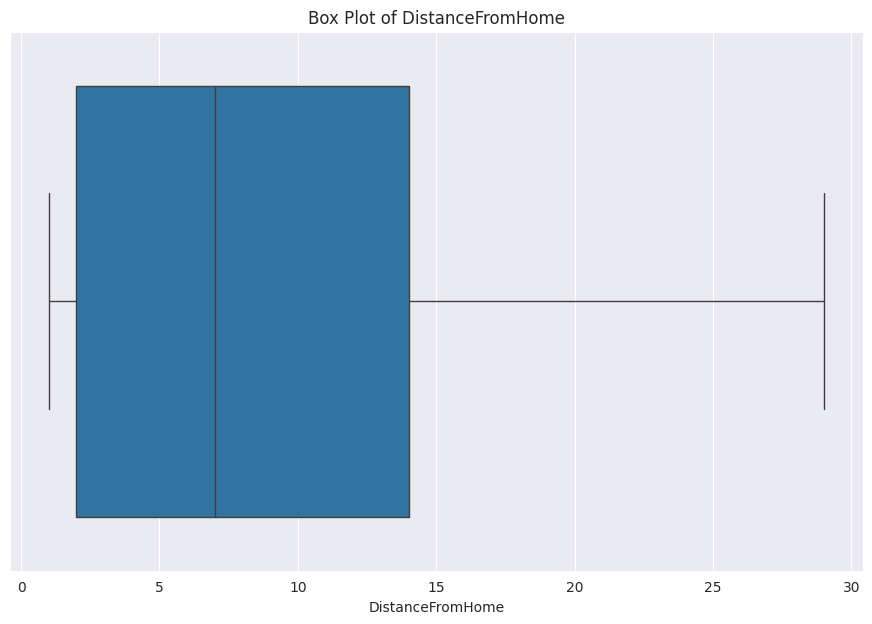

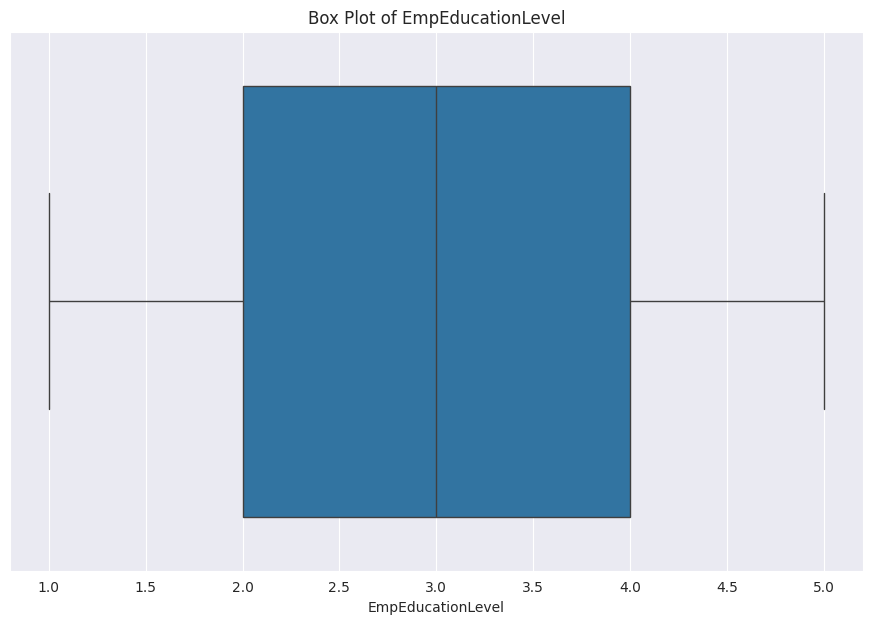

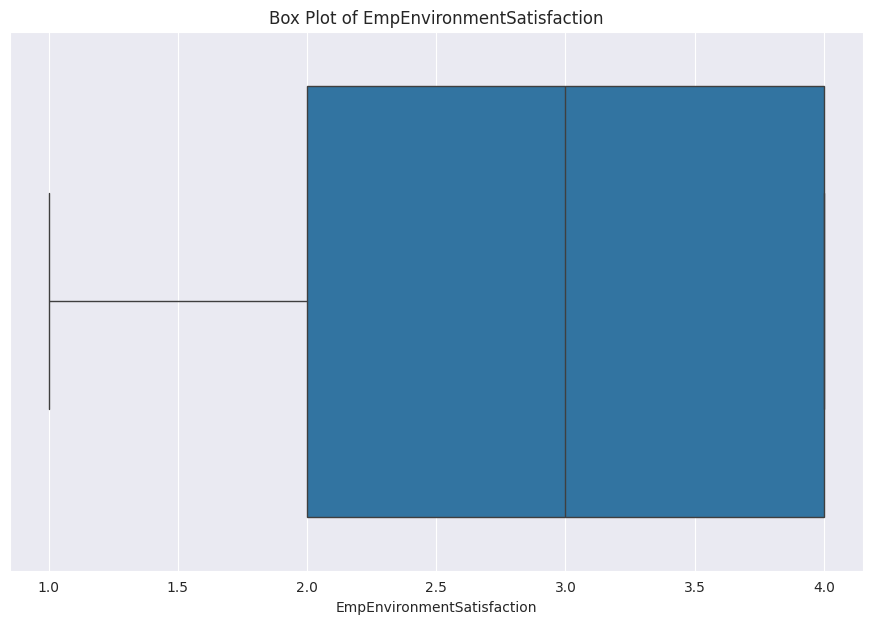

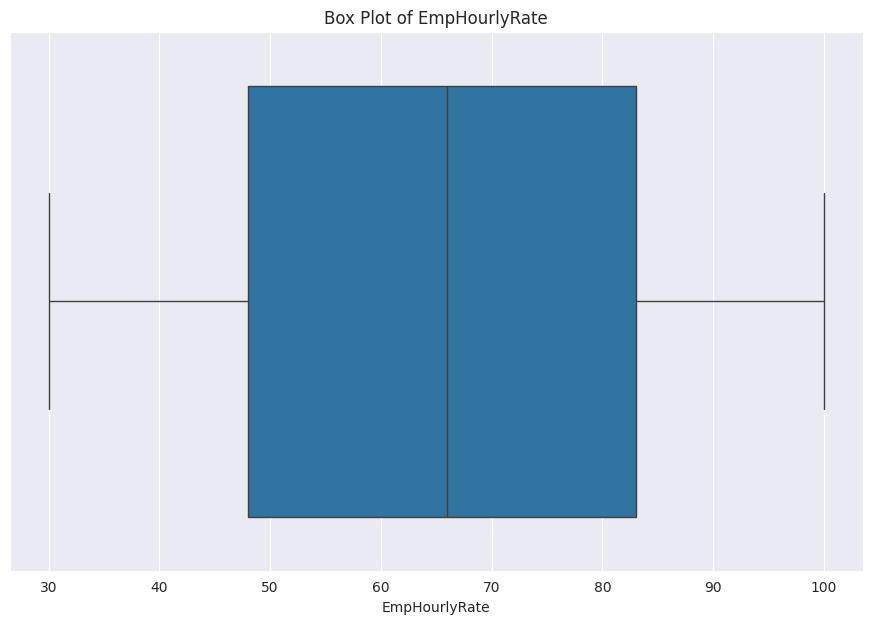

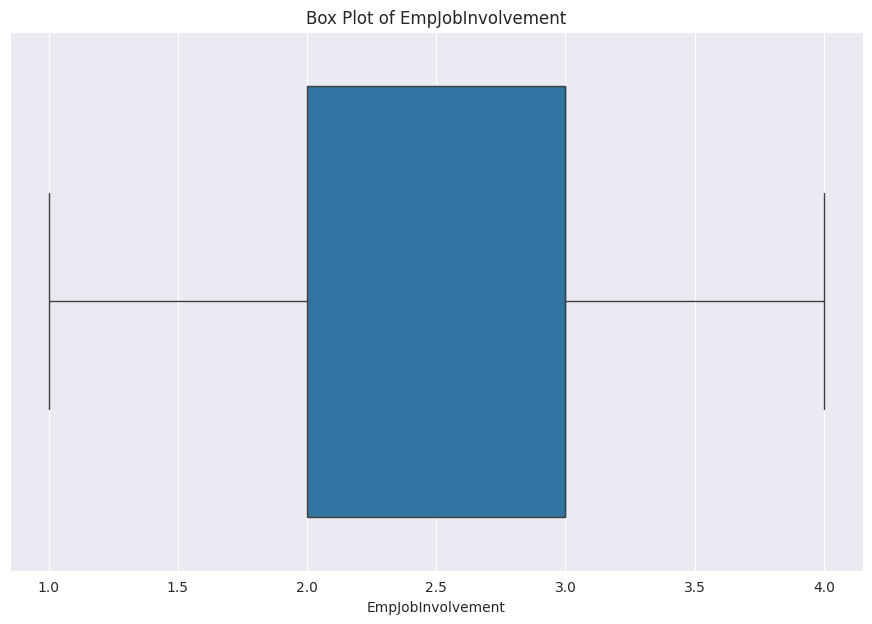

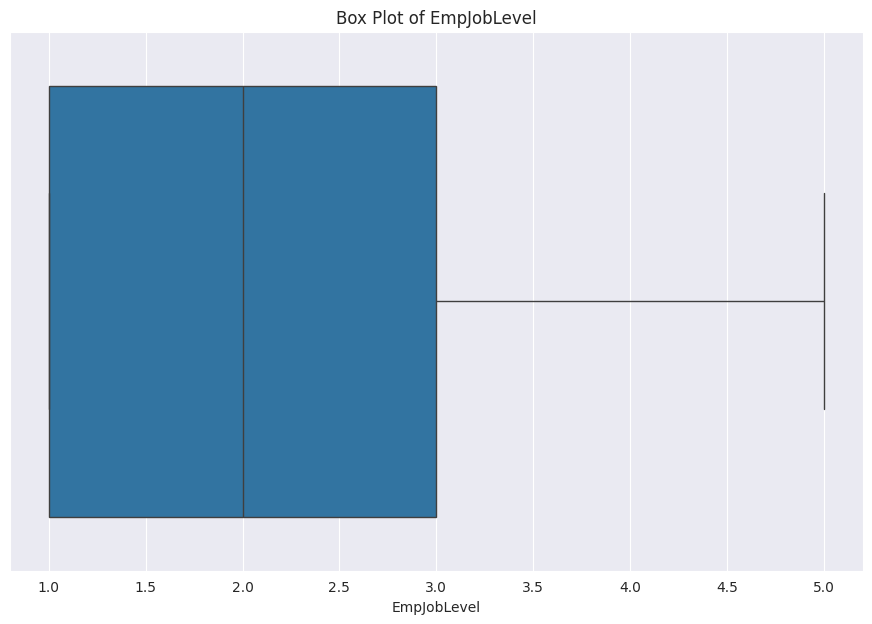

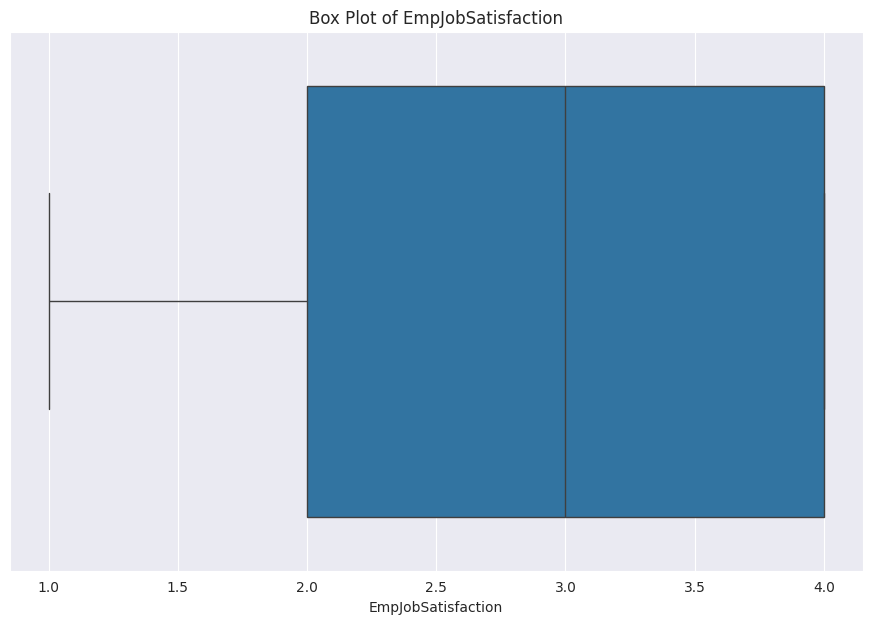

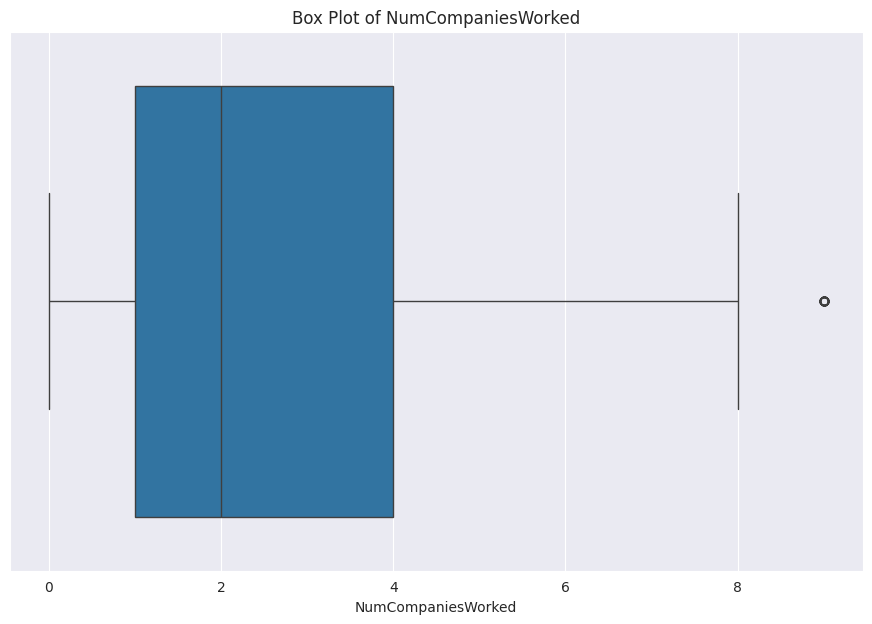

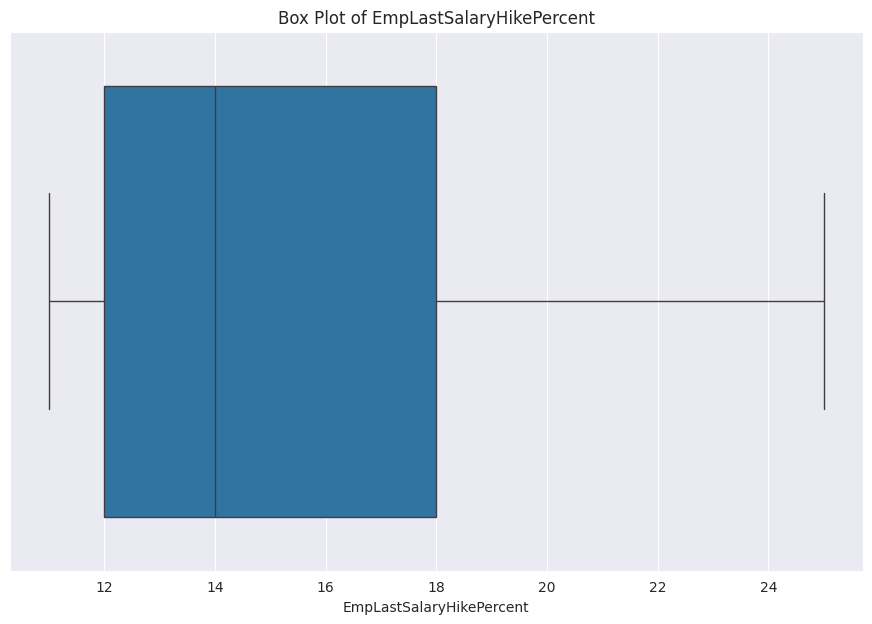

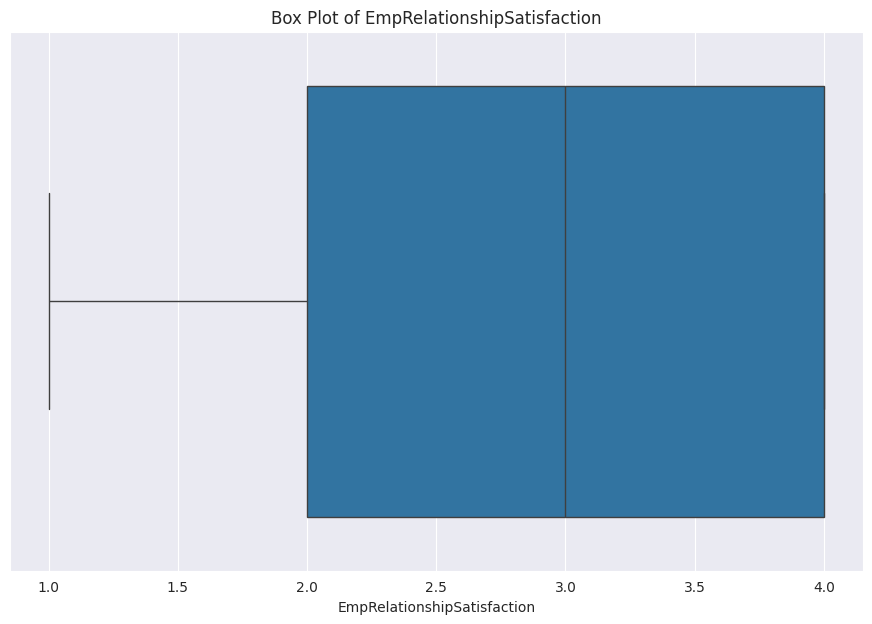

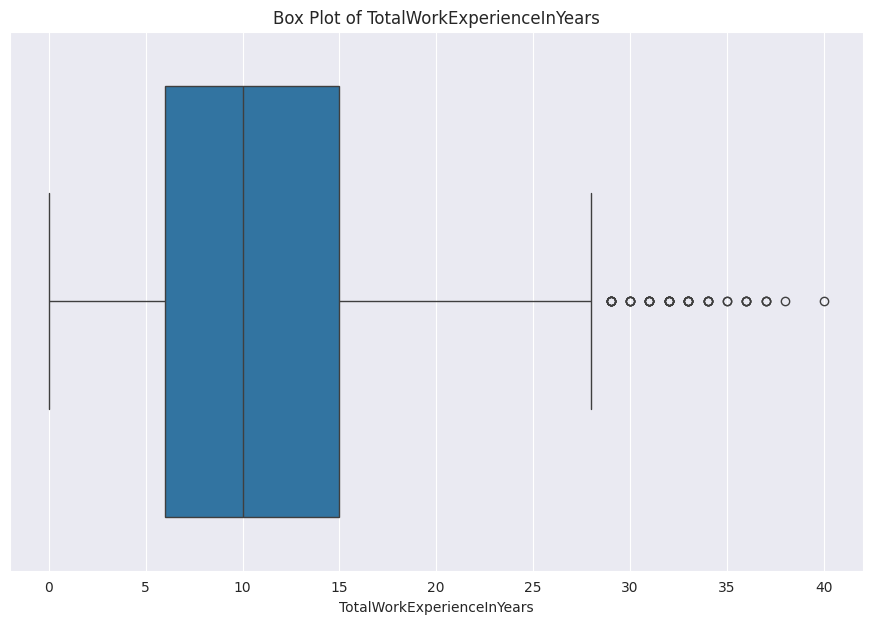

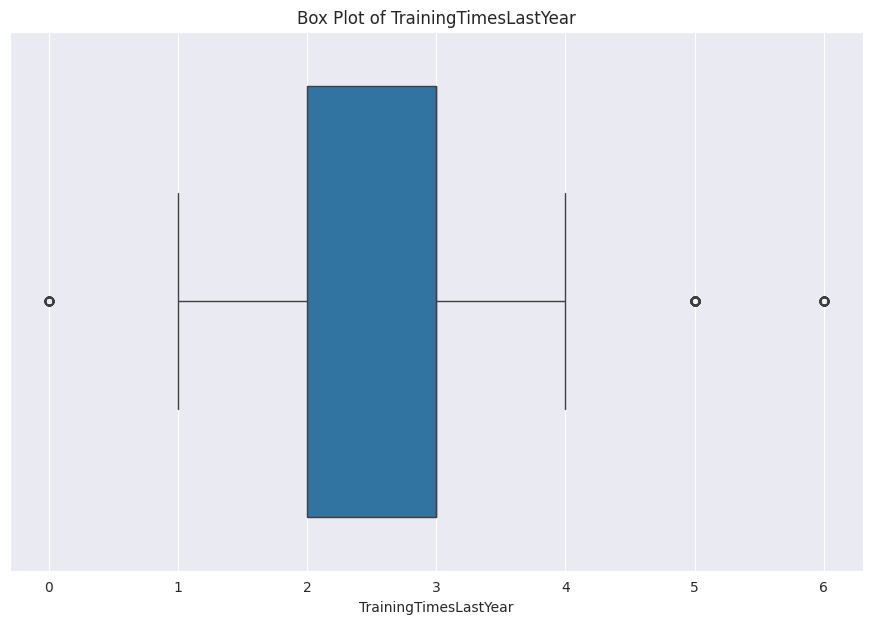

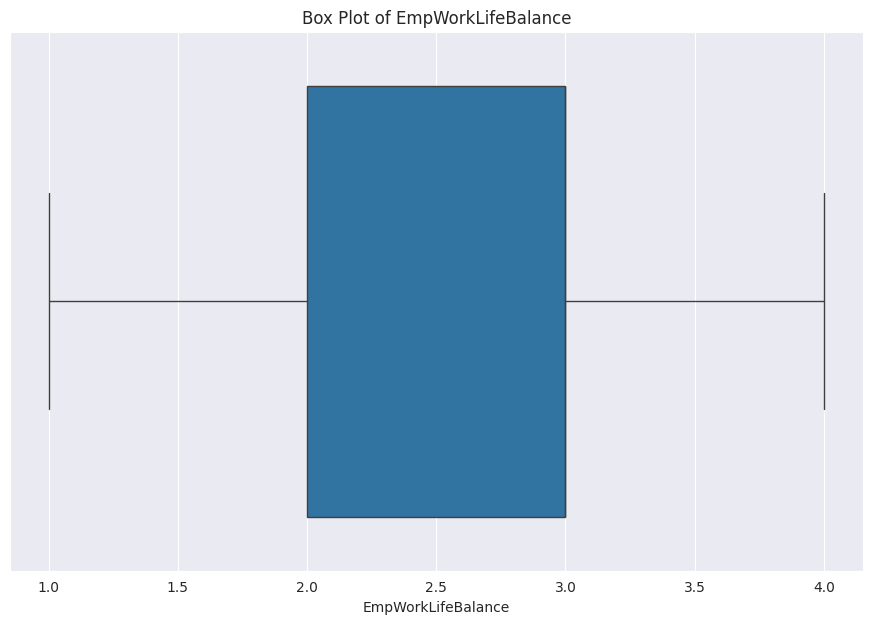

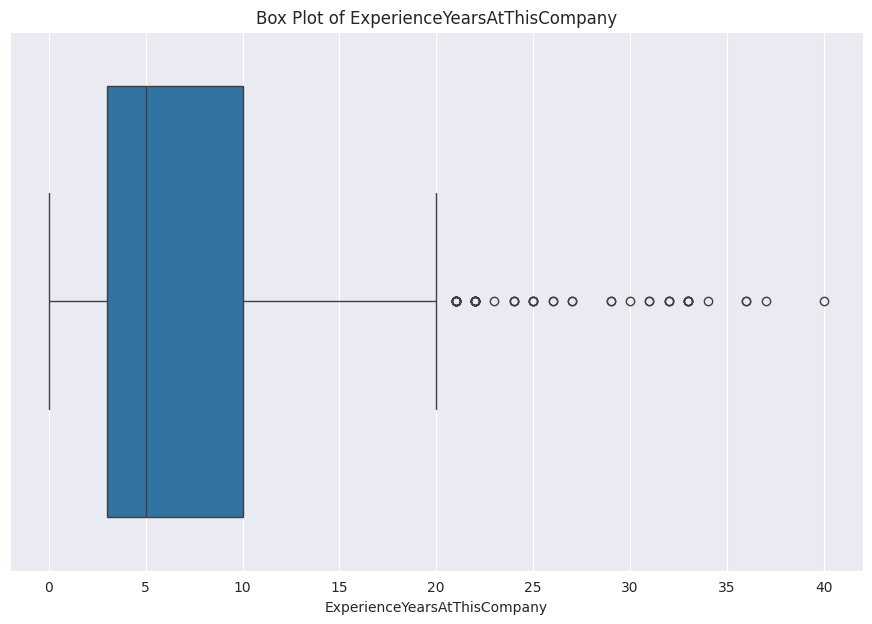

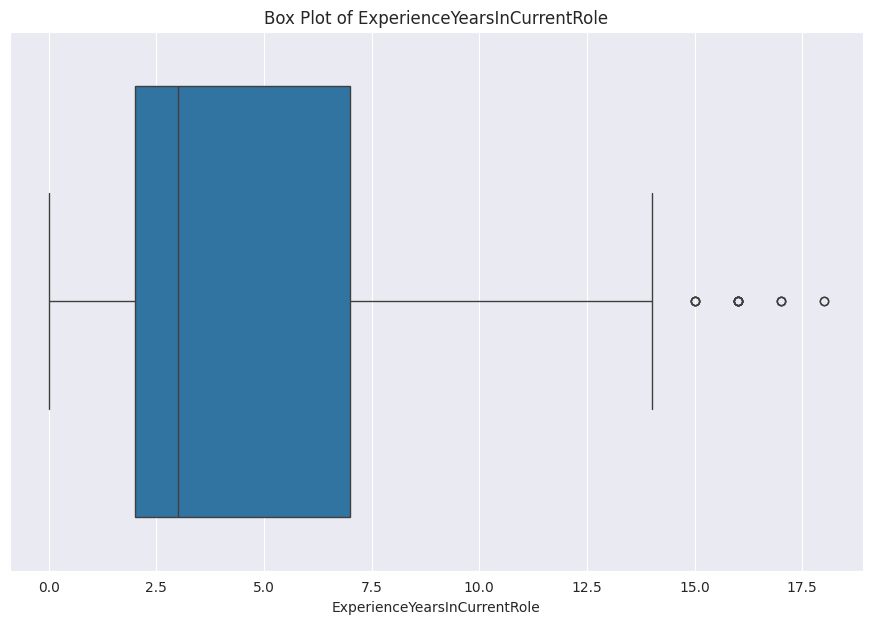

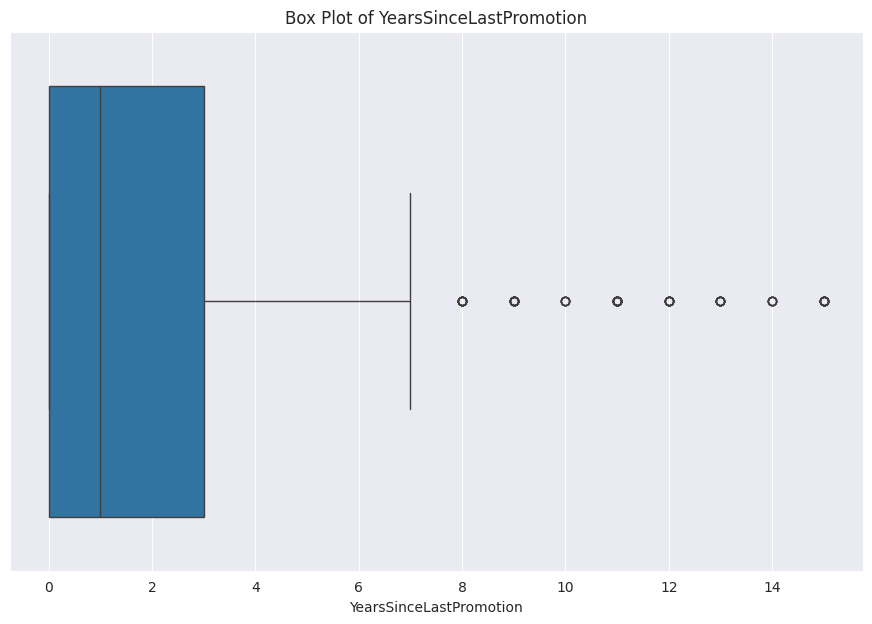

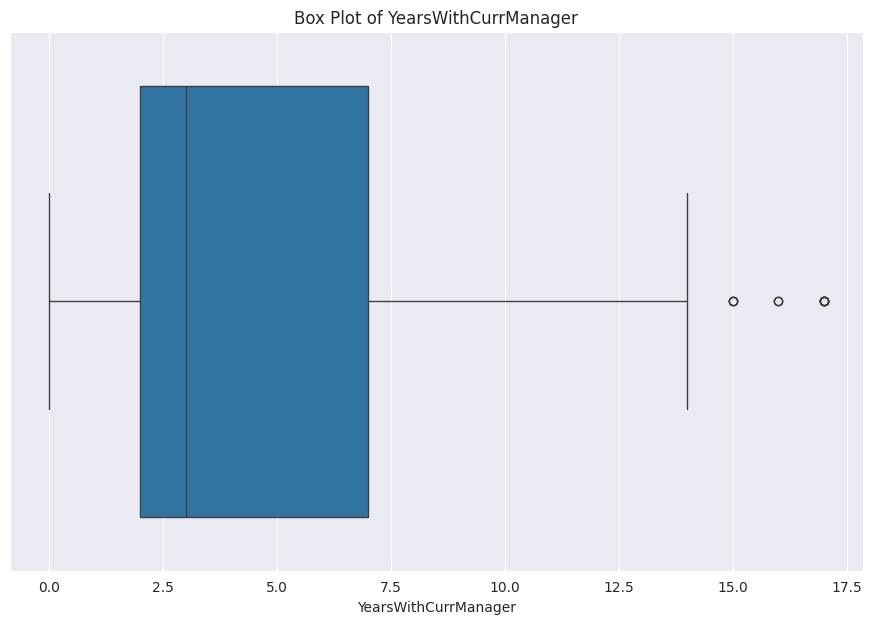

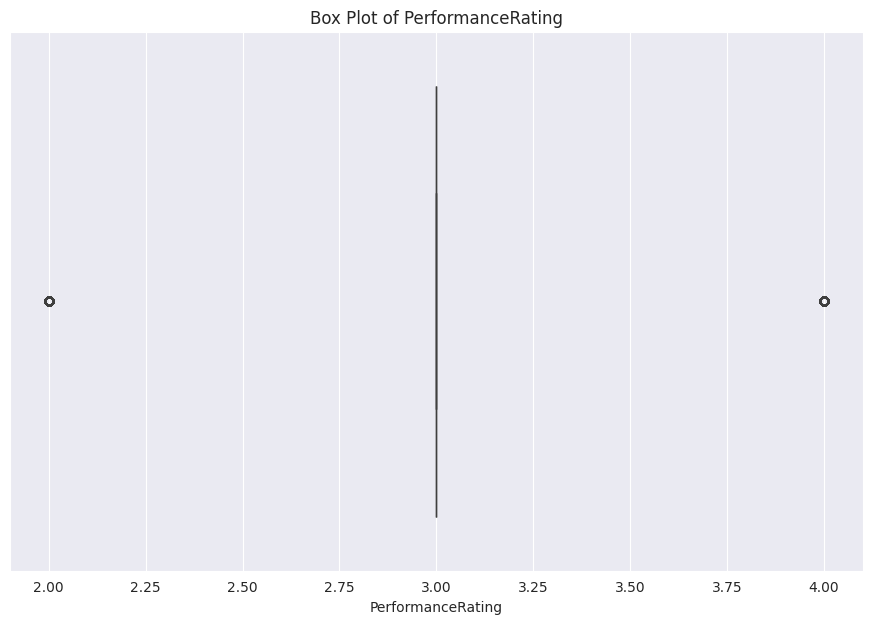

In [21]:
for column in num_data:
  plt.figure(figsize=(11,7))
  sns.boxplot(x=data[column])
  plt.xlabel(column)
  plt.title(f'Box Plot of {column}')
  plt.show()


# Working on Outliers

# Checking Distributions before handling the data

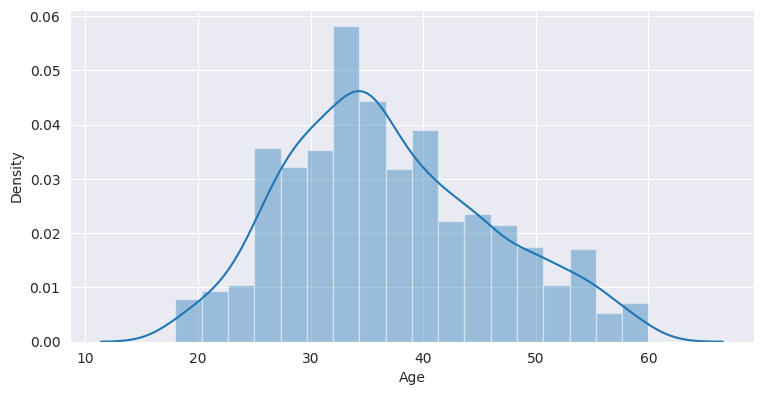

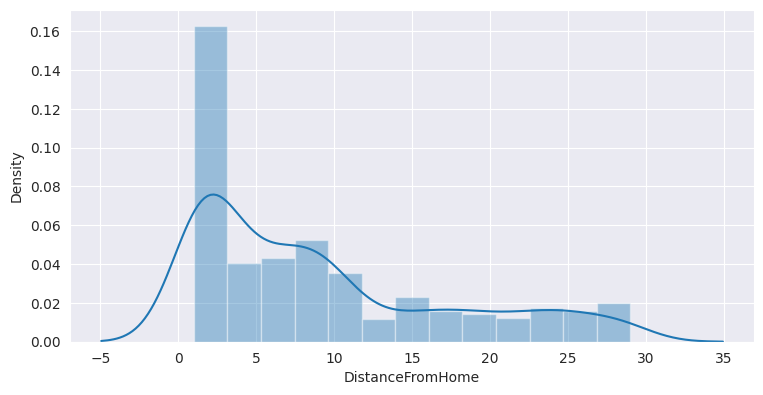

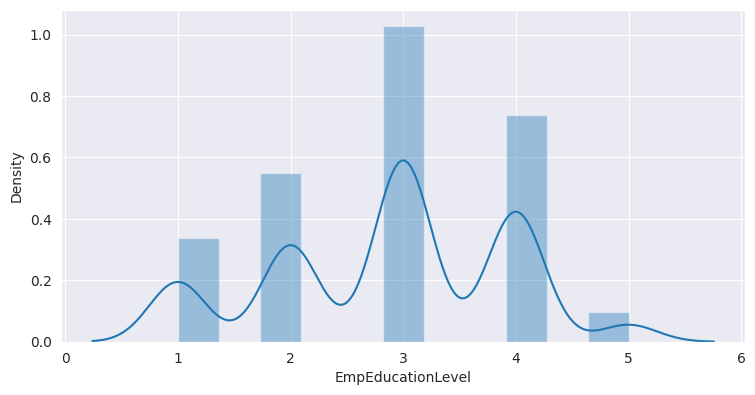

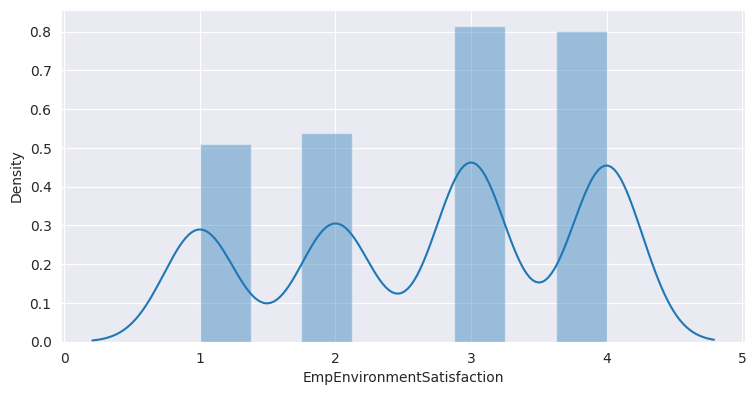

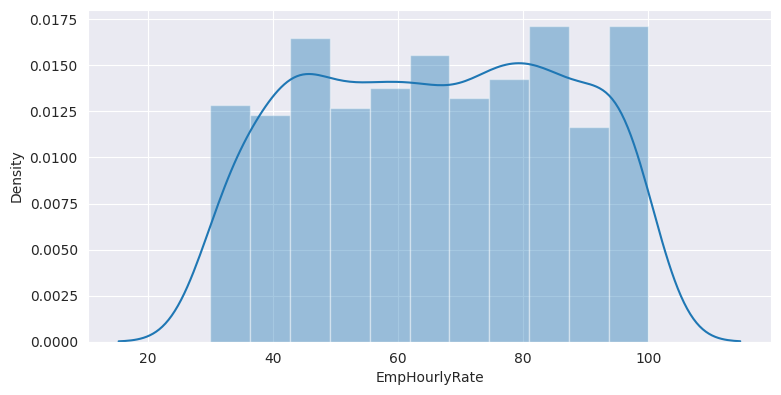

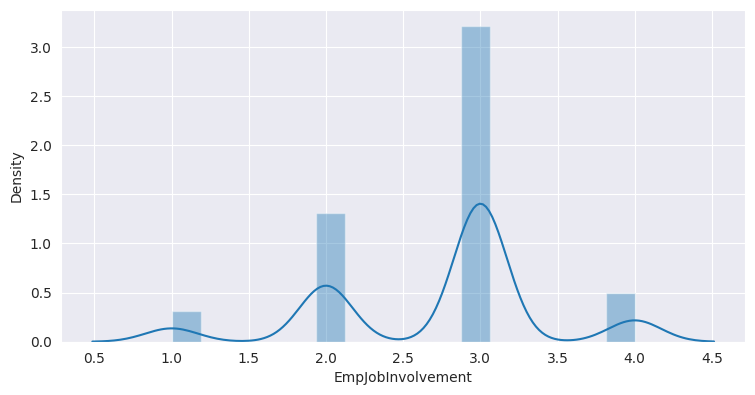

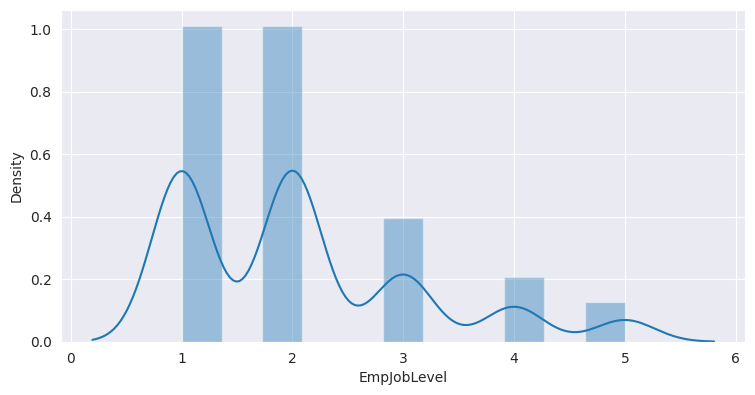

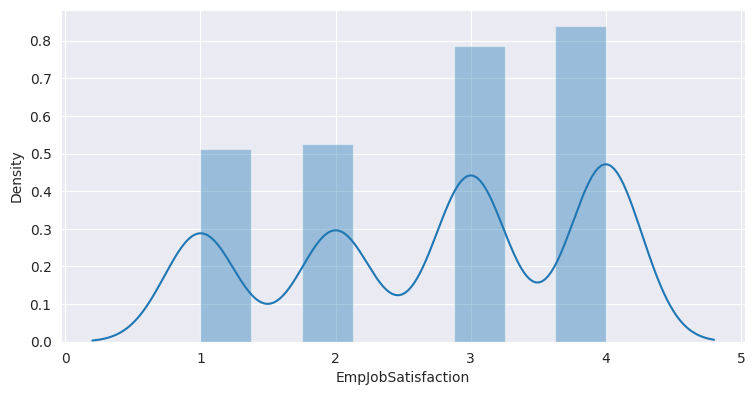

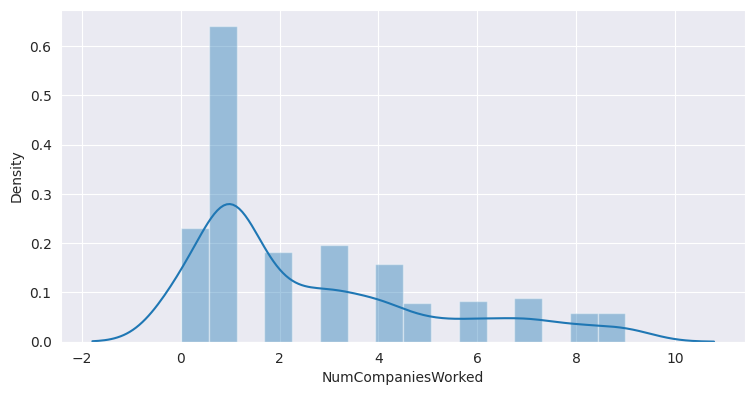

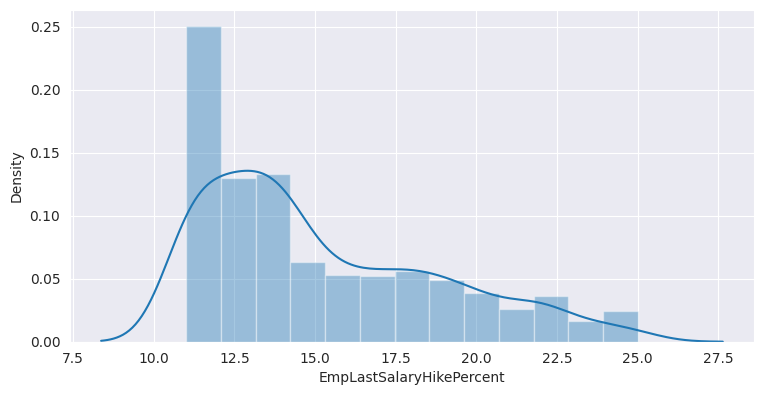

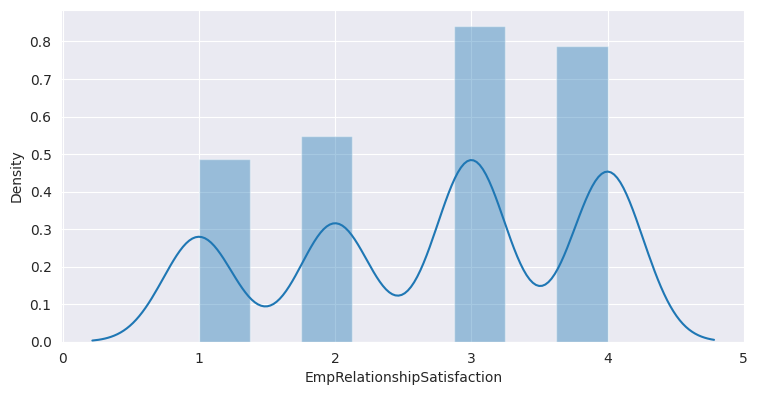

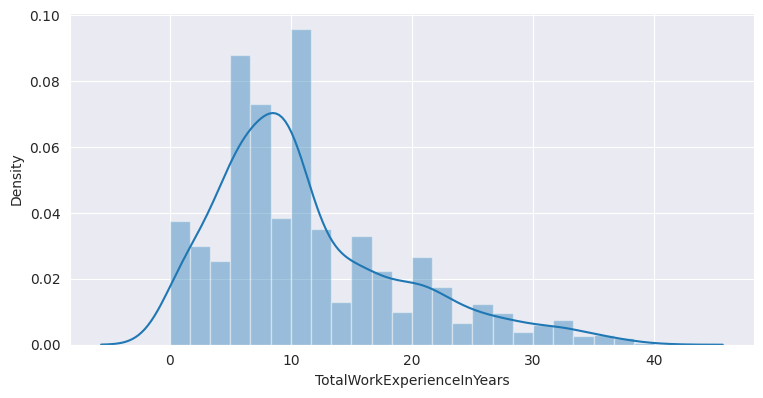

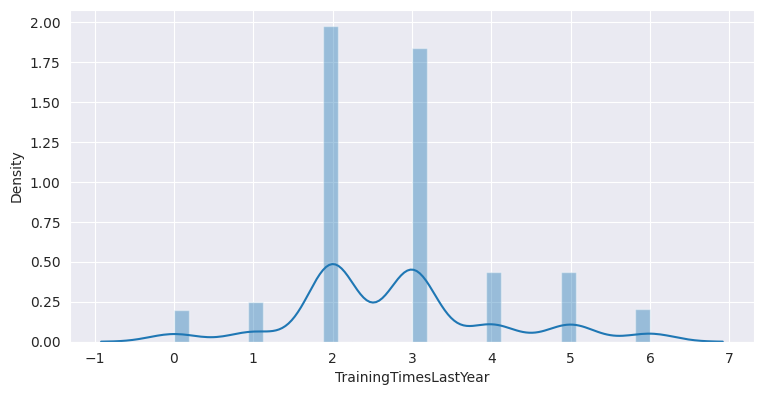

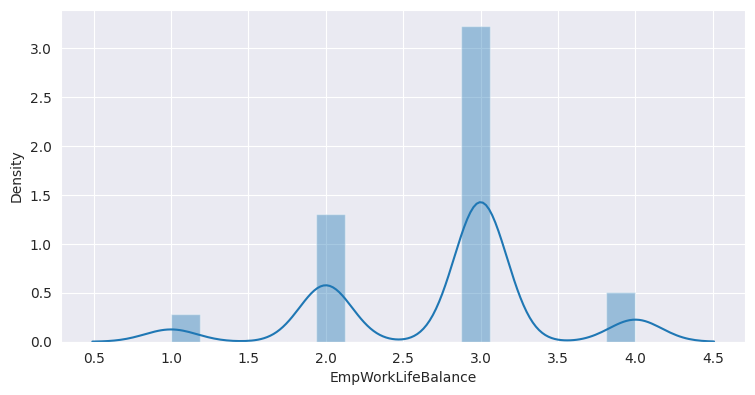

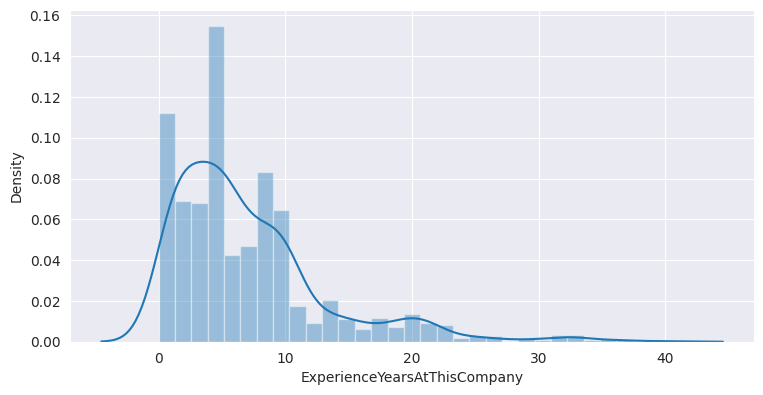

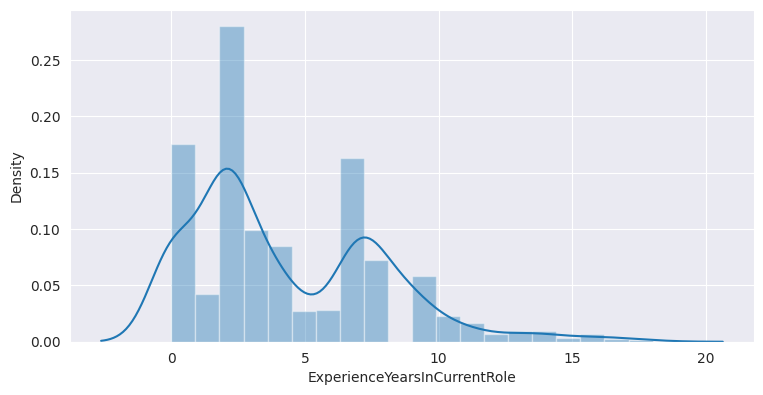

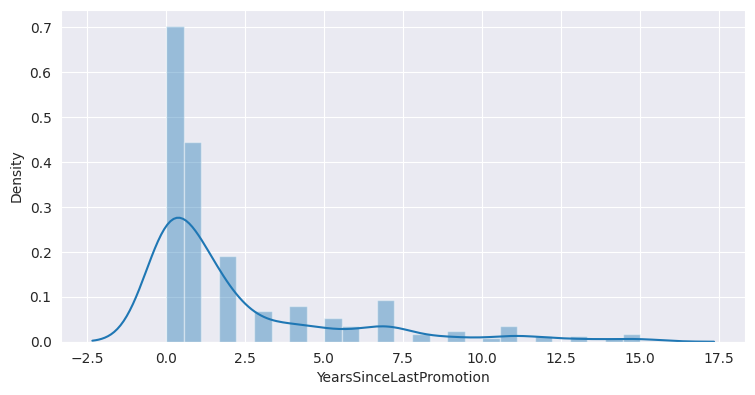

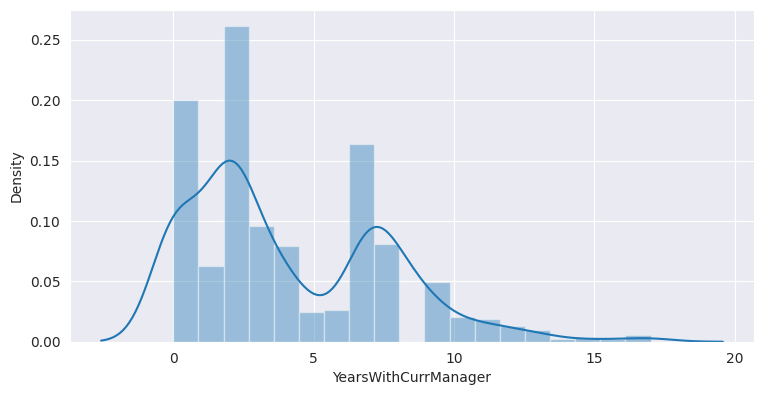

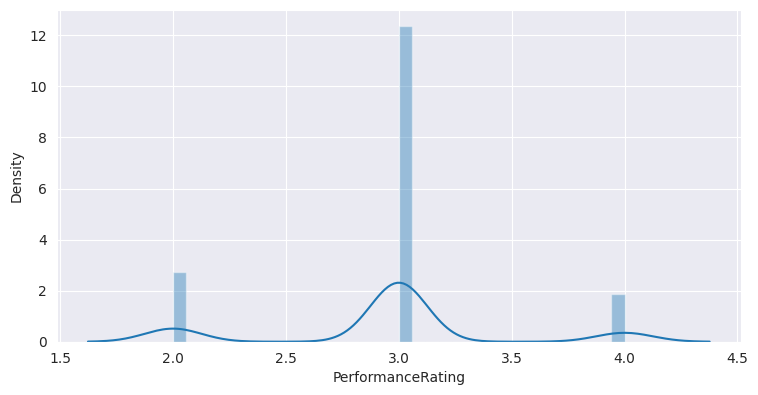

In [22]:
for column in num_data:
  plt.figure(figsize=(30,25))
  plt.subplot(5,3,1)
  sns.distplot(num_data[column])

plt.show()

# 1) NumCompaniesWorked
* It is not normally distributed, so we are using IQR method

In [23]:
iqr = stats.iqr(data['NumCompaniesWorked'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['NumCompaniesWorked'].quantile(0.25)  # first quantile
Q3 = data['NumCompaniesWorked'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)

max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 3.0
minimum limit -3.5
maximum limit 8.5


In [24]:
len(data.loc[data['NumCompaniesWorked'] > max_limit])/18278*100

0.21337126600284498

In [25]:

data.loc[data['NumCompaniesWorked'] < min_limit,'NumCompaniesWorked'] = data['NumCompaniesWorked'].median()
data.loc[data['NumCompaniesWorked'] > max_limit,'NumCompaniesWorked'] = data['NumCompaniesWorked'].median()

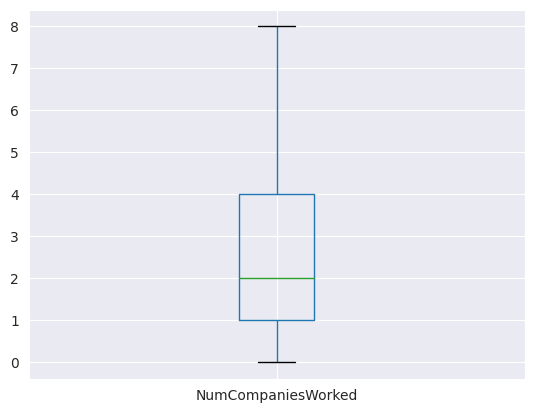

In [26]:
data.boxplot('NumCompaniesWorked')
plt.show()

# TotalWorkExperienceInYears

In [27]:
iqr=stats.iqr(data['TotalWorkExperienceInYears'], interpolation='midpoint')
print('IQR', iqr)

IQR 9.0


In [28]:
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

max_limit=  Q3 + 1.5*iqr
min_limit=  Q1 - 1.5*iqr

print('Maximum_limit',max_limit )
print('Minimum_limit',min_limit)

Maximum_limit 28.5
Minimum_limit -7.5


In [29]:
data.loc[data['TotalWorkExperienceInYears'] < min_limit, 'TotalWorkExperienceInYears'] = min_limit
data.loc[data['TotalWorkExperienceInYears'] >max_limit, 'TotalWorkExperienceInYears'] = 25

<Axes: ylabel='TotalWorkExperienceInYears'>

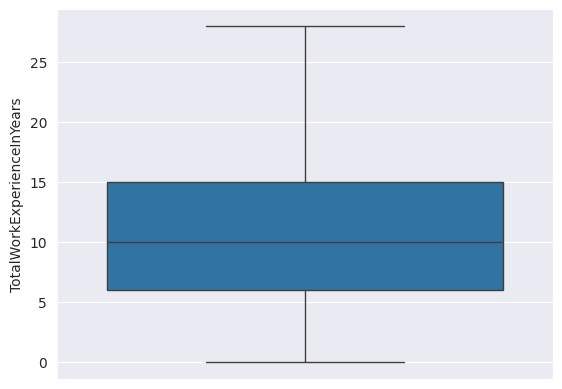

In [30]:
sns.boxplot(data['TotalWorkExperienceInYears'])

# TrainingTimesLastYear

In [31]:
iqr=stats.iqr(data['TrainingTimesLastYear'], interpolation='midpoint')
print('IQR', iqr)

Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

max_limit=  Q3 + 1.5*iqr
min_limit=  Q1 - 1.5*iqr

print('Maximum_limit',max_limit )
print('Minimum_limit',min_limit)

IQR 1.0
Maximum_limit 4.5
Minimum_limit 0.5


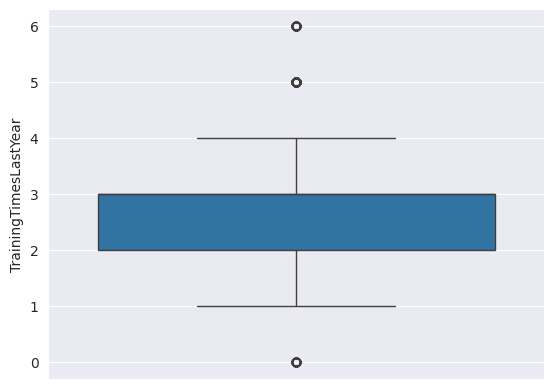

In [32]:
sns.boxplot(data['TrainingTimesLastYear'])
plt.show()

In [33]:
data.loc[data['TrainingTimesLastYear'] < min_limit, 'TrainingTimesLastYear'] = min_limit
data.loc[data['TrainingTimesLastYear'] >max_limit, 'TrainingTimesLastYear'] = max_limit

<Axes: ylabel='TrainingTimesLastYear'>

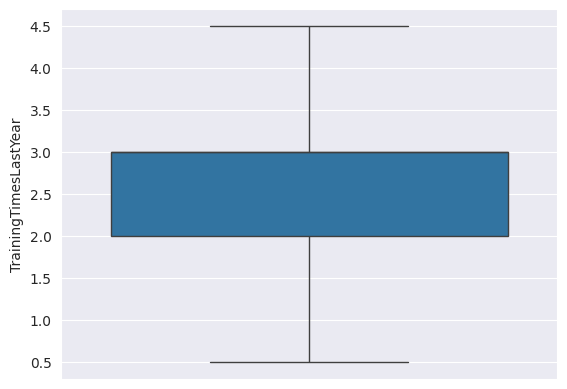

In [34]:
sns.boxplot(data['TrainingTimesLastYear'])

# ExperienceYearsAtThisCompany

In [35]:
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'], interpolation='midpoint')
print('IQR', iqr)

Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

max_limit=  Q3 + 1.5*iqr
min_limit=  Q1 - 1.5*iqr

print('Maximum_limit',max_limit )
print('Minimum_limit',min_limit)

IQR 7.0
Maximum_limit 20.5
Minimum_limit -7.5


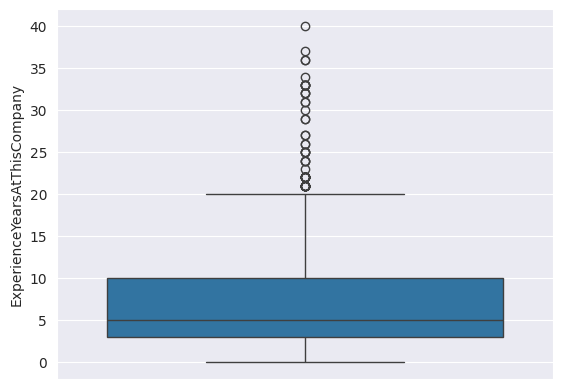

In [36]:
sns.boxplot(data['ExperienceYearsAtThisCompany'])
plt.show()

In [37]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit, 'ExperienceYearsAtThisCompany'] = max_limit


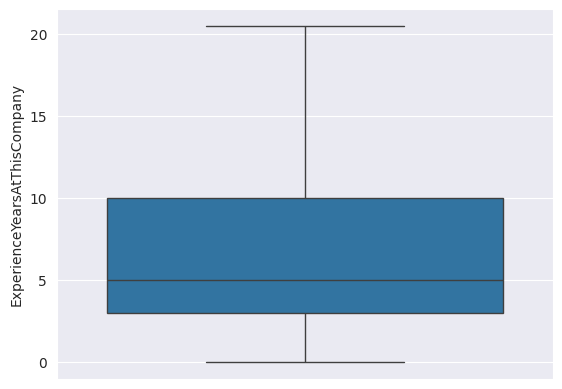

In [38]:
sns.boxplot(data['ExperienceYearsAtThisCompany'])
plt.show()

In [39]:
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'], interpolation='midpoint')
print('IQR', iqr)

Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

max_limit=  Q3 + 1.5*iqr
min_limit=  Q1 - 1.5*iqr

print('Maximum_limit',max_limit )
print('Minimum_limit',min_limit)

IQR 5.0
Maximum_limit 14.5
Minimum_limit -5.5


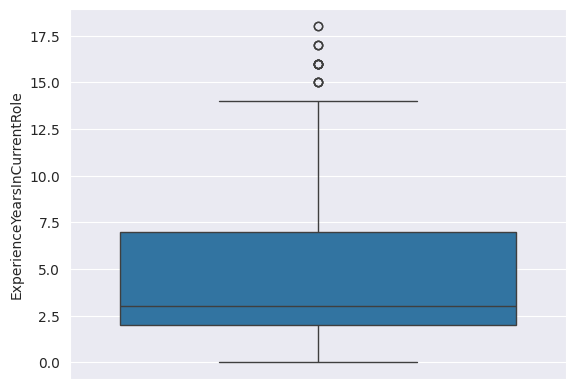

In [40]:
sns.boxplot(data['ExperienceYearsInCurrentRole'])
plt.show()

In [41]:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit, 'ExperienceYearsInCurrentRole'] = max_limit

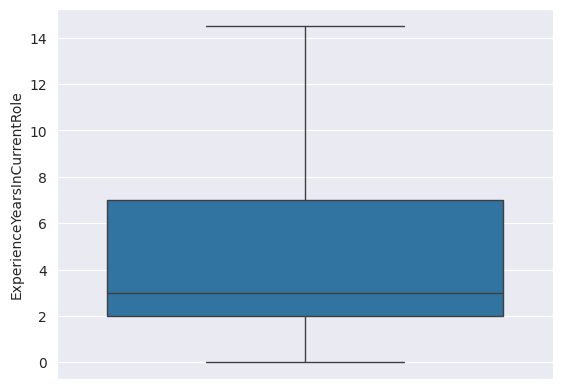

In [42]:
sns.boxplot(data['ExperienceYearsInCurrentRole'])
plt.show()

# YearsSinceLastPromotion


In [43]:
iqr = stats.iqr(data['YearsSinceLastPromotion'], interpolation='midpoint')
print('IQR', iqr)

Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

max_limit=  Q3 + 1.5*iqr
min_limit=  Q1 - 1.5*iqr

print('Maximum_limit',max_limit )
print('Minimum_limit',min_limit)

IQR 3.0
Maximum_limit 7.5
Minimum_limit -4.5


In [44]:
data.loc[data['YearsSinceLastPromotion'] > max_limit, 'YearsSinceLastPromotion'] = max_limit

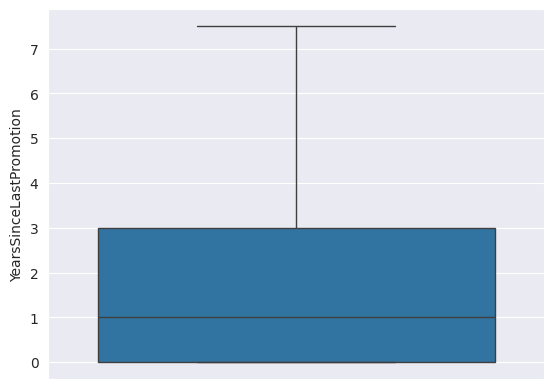

In [45]:
sns.boxplot(data['YearsSinceLastPromotion'])
plt.show()

# YearsWithCurrManager

In [46]:
iqr = stats.iqr(data['YearsWithCurrManager'], interpolation='midpoint')
print('IQR', iqr)

Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

max_limit=  Q3 + 1.5*iqr
min_limit=  Q1 - 1.5*iqr

print('Maximum_limit',max_limit )
print('Minimum_limit',min_limit)

IQR 5.0
Maximum_limit 14.5
Minimum_limit -5.5


In [47]:
data.loc[data['YearsWithCurrManager'] > max_limit, 'YearsWithCurrManager'] = max_limit

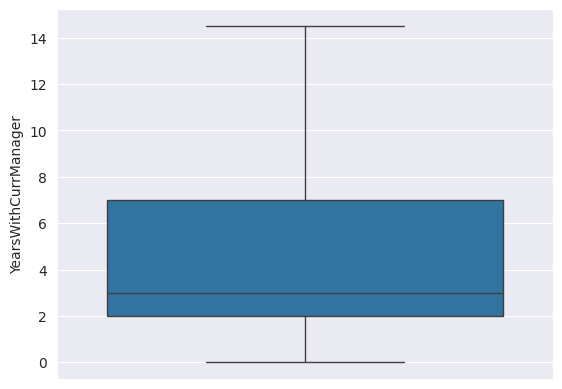

In [48]:
sns.boxplot(data['YearsWithCurrManager'])
plt.show()

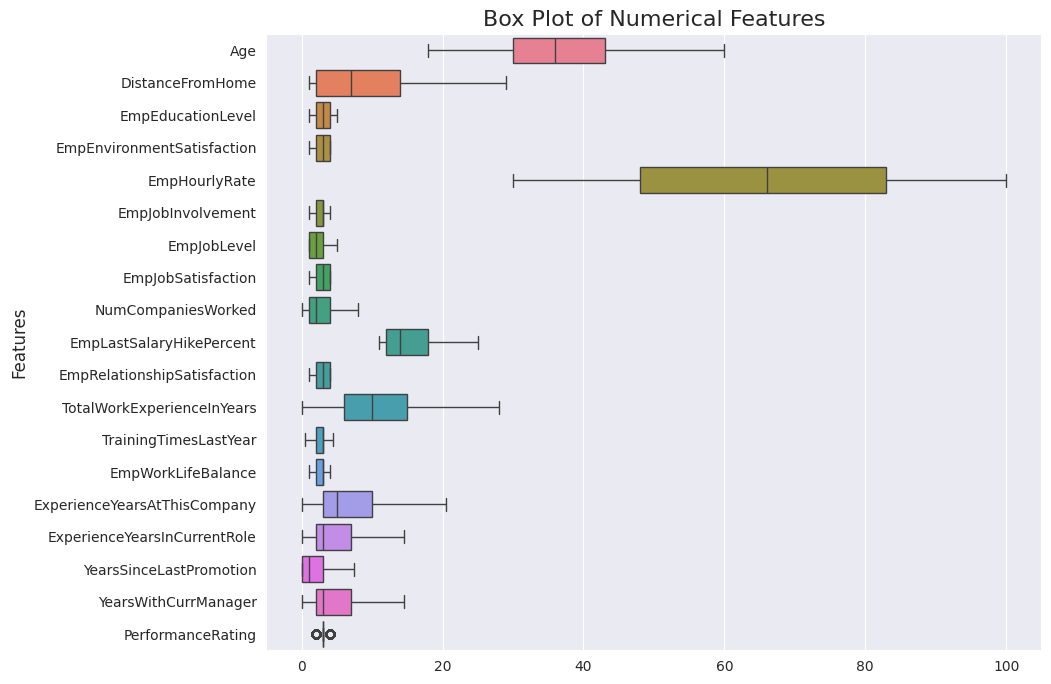

In [49]:
# Visualize boxplot after handling outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.show()

In [50]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,No,3


# Encoding

We are going to use lable encoding

In [51]:
list(cat_data.iloc[:,1:])

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [52]:
cat_to_num = data[['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']]

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

In [55]:
data[['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']]=data[['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']].apply(le.fit_transform)

In [56]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,1,3,1,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0,4
1196,E100993,37,1,1,2,1,15,2,10,2,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0,3
1197,E100994,50,1,3,1,1,15,2,28,1,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0,3
1198,E100995,34,0,3,2,0,1,2,9,3,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0,3


# The data is Imbalance, we need to balance this data to get the better result on Machine Learning Algorithms

# Dividing the Data into Independent variables(x) and dependent variable(y).

In [106]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
x

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,20,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0
1196,37,1,1,2,1,15,2,10,2,4,...,17,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0
1197,50,1,3,1,1,15,2,28,1,4,...,11,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0
1198,34,0,3,2,0,1,2,9,3,4,...,14,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0


In [107]:
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

In [108]:
distribution=y.value_counts(normalize=True)*100
distribution

PerformanceRating
3    72.833333
2    16.166667
4    11.000000
Name: proportion, dtype: float64

* Here we can clearly see that the 3 class has majority values compared to values 2 and 4

<Axes: xlabel='PerformanceRating'>

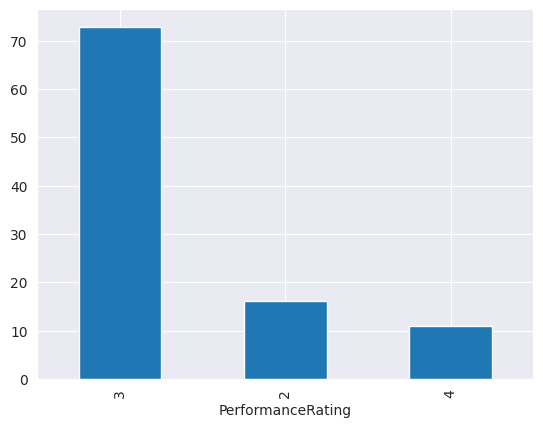

In [109]:
distribution.plot(kind='bar')

In [110]:

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scaler=StandardScaler()
# X2=scaler.fit_transform(x)

# Handling Imbalance data

In [111]:
from imblearn.over_sampling import RandomOverSampler

In [112]:
oversample=RandomOverSampler()

x_smote, y_smote= oversample.fit_resample(x, y)

In [113]:
x_smote

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,18,0,1,2,4,9,0,1,3,4,...,15,3,0.0,4.5,4,0.0,0.0,0.0,0.0,0
2618,50,1,3,0,1,15,2,1,2,4,...,22,3,25.0,1.0,2,5.0,4.0,1.0,3.0,0
2619,42,1,2,2,5,13,2,4,4,2,...,13,4,9.0,3.0,4,6.0,4.0,1.0,5.0,0
2620,40,1,3,0,4,12,2,2,3,3,...,14,3,8.0,3.0,4,3.0,1.0,1.0,2.0,0


In [114]:
# y_smote=y_smote-2
y_smote

0       3
1       3
2       4
3       3
4       3
       ..
2617    4
2618    4
2619    4
2620    4
2621    4
Name: PerformanceRating, Length: 2622, dtype: int64

In [115]:
y_smote.value_counts()

PerformanceRating
3    874
4    874
2    874
Name: count, dtype: int64

In [127]:
y_smote.replace({4:2, 3:1, 2:0}, inplace=True)

# Feature Selection

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# bestfeatures = SelectKBest(score_func=chi2,k=10)
# fit = bestfeatures.fit(x_smote,y_smote)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x_smote.columns)

# featurescores = pd.concat([dfcolumns,dfscores],axis=1)
# featurescores.columns = ['feature_names','Scores']

# print(featurescores.nlargest(10,'Scores'))

In [ ]:
# x=x_smote.loc[:,['EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','ExperienceYearsInCurrentRole'
# ,'ExperienceYearsAtThisCompany','EmpJobRole','YearsSinceLastPromotion','YearsWithCurrManager','EmpDepartment',
#                  'DistanceFromHome','TotalWorkExperienceInYears']]

In [128]:
y_smote

0       1
1       1
2       2
3       1
4       1
       ..
2617    2
2618    2
2619    2
2620    2
2621    2
Name: PerformanceRating, Length: 2622, dtype: int64

# Splitting the dataset into Traingn and testing set

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)


In [117]:
x_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1760,55,1,5,0,2,4,2,22,3,1,...,12,4,8.0,1.0,3,4.0,2.0,1.0,2.0,0
1521,32,0,2,2,5,13,1,8,3,2,...,14,4,9.0,2.0,3,9.0,8.0,3.0,7.0,0
166,48,1,1,2,4,16,2,4,4,3,...,14,2,27.0,3.0,3,15.0,11.0,4.0,8.0,0
976,25,0,1,1,1,3,2,1,3,1,...,12,4,5.0,3.0,3,4.0,2.0,1.0,2.0,0
49,29,0,1,1,1,3,2,1,2,2,...,11,4,1.0,1.0,3,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,40,1,3,0,0,1,2,2,2,1,...,19,4,22.0,4.5,3,20.5,7.0,3.0,9.0,0
1095,30,0,5,2,5,13,2,12,3,2,...,11,2,6.0,4.5,3,5.0,4.0,4.0,4.0,0
1130,34,0,0,0,3,6,1,23,3,2,...,15,3,11.0,2.0,3,3.0,2.0,0.0,2.0,1
1294,27,0,3,1,5,14,2,23,1,2,...,21,4,9.0,4.5,3,9.0,8.0,5.0,8.0,0


In [118]:
y_train

1760    2
1521    2
166     3
976     3
49      3
       ..
1638    2
1095    2
1130    3
1294    2
860     3
Name: PerformanceRating, Length: 2097, dtype: int64

# Model Creation

1 ) Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [120]:
y_pred=LR.predict(x_test)

In [121]:
y_pred

array([2, 3, 2, 3, 4, 4, 2, 2, 3, 2, 3, 3, 3, 4, 2, 2, 3, 4, 4, 3, 2, 4,
       4, 2, 2, 3, 2, 4, 2, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 3, 4, 2,
       2, 2, 2, 2, 4, 3, 2, 3, 3, 4, 2, 3, 3, 3, 4, 2, 4, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 3, 4,
       2, 2, 3, 3, 3, 2, 3, 4, 3, 4, 4, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 4,
       3, 4, 3, 2, 4, 4, 3, 2, 2, 3, 4, 4, 3, 3, 2, 3, 2, 4, 2, 4, 3, 3,
       2, 4, 4, 2, 2, 3, 2, 2, 2, 4, 3, 4, 3, 2, 2, 3, 2, 4, 4, 2, 4, 3,
       2, 4, 3, 4, 2, 2, 3, 4, 4, 2, 4, 2, 3, 4, 2, 3, 2, 3, 4, 4, 4, 4,
       4, 4, 3, 4, 3, 4, 4, 2, 2, 3, 4, 3, 2, 4, 3, 3, 2, 2, 2, 3, 2, 4,
       2, 3, 4, 3, 2, 2, 2, 4, 4, 2, 3, 2, 3, 4, 4, 4, 2, 2, 4, 3, 3, 3,
       4, 3, 4, 3, 2, 4, 2, 4, 4, 3, 3, 4, 4, 4, 3, 4, 2, 4, 3, 3, 3, 3,
       2, 2, 2, 4, 3, 3, 4, 4, 2, 2, 4, 3, 2, 2, 3, 3, 4, 2, 3, 3, 4, 3,
       3, 2, 2, 2, 4, 2, 4, 3, 4, 3, 3, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 3,
       4, 3, 2, 2, 2, 4, 4, 3, 4, 2, 4, 4, 3, 2, 4,

In [122]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score,precision_score, f1_score

In [123]:
accuracy_score(y_test, y_pred)

0.780952380952381

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.81      0.84      0.82       184
           3       0.75      0.64      0.69       173
           4       0.78      0.86      0.82       168

    accuracy                           0.78       525
   macro avg       0.78      0.78      0.78       525
weighted avg       0.78      0.78      0.78       525



In [125]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=100)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           2       0.96      0.97      0.97       184
           3       0.97      0.92      0.94       173
           4       0.96      1.00      0.98       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [99]:
y

0       1
1       1
2       2
3       1
4       1
       ..
1195    2
1196    1
1197    1
1198    1
1199    0
Name: PerformanceRating, Length: 1200, dtype: int64

In [131]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_predict = xgbc.predict(x_test)


In [132]:
print(accuracy_score(y_test, y_predict))

0.9847619047619047


In [133]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       184
           1       1.00      0.95      0.98       173
           2       0.99      1.00      0.99       168

    accuracy                           0.98       525
   macro avg       0.99      0.98      0.98       525
weighted avg       0.99      0.98      0.98       525

